In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15), object(2)
memory usage: 3.3+ MB


In [4]:
df.isnull().sum()/len(df)

INCIDENT_ID         0.000000
DATE                0.000000
X_1                 0.000000
X_2                 0.000000
X_3                 0.000000
X_4                 0.000000
X_5                 0.000000
X_6                 0.000000
X_7                 0.000000
X_8                 0.000000
X_9                 0.000000
X_10                0.000000
X_11                0.000000
X_12                0.007629
X_13                0.000000
X_14                0.000000
X_15                0.000000
MULTIPLE_OFFENSE    0.000000
dtype: float64

In [5]:
# Since the features of data are unkown, we cannot do much eda of this dataset

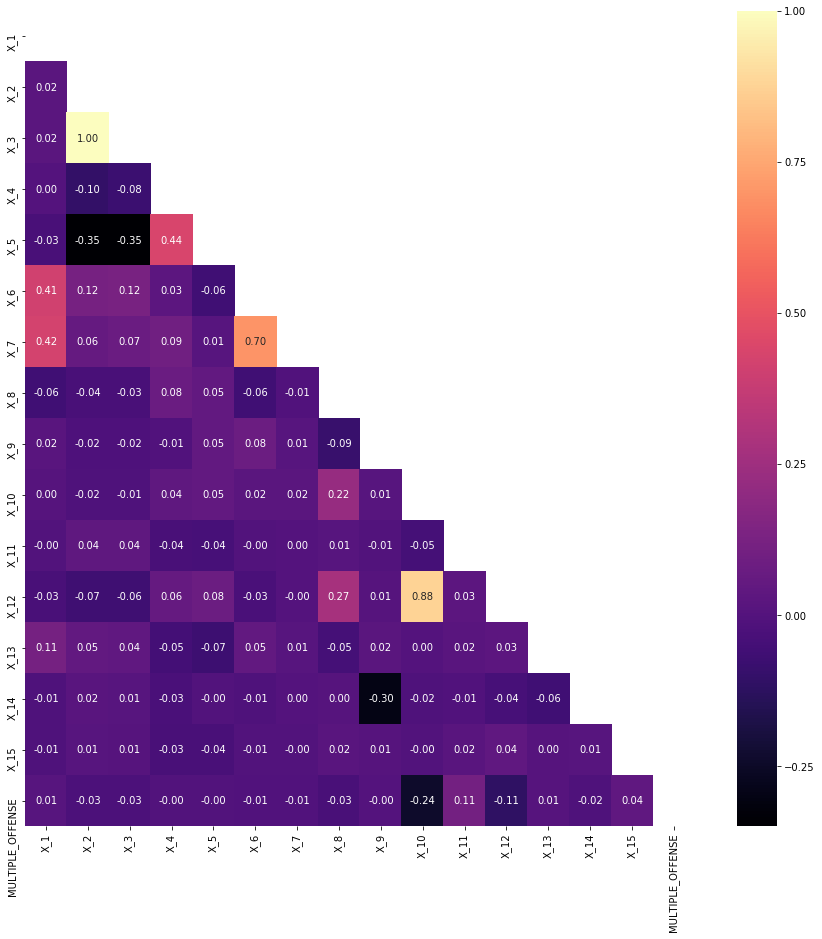

In [6]:
mask_ut=np.triu(np.ones(df.corr().shape)).astype(np.bool)
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt = '.2f', mask=mask_ut, cmap="magma")

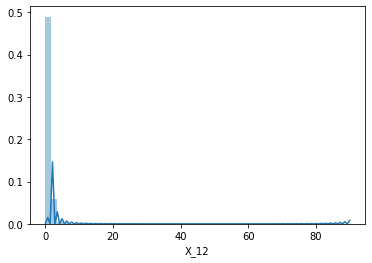

In [7]:
sns.distplot(df.X_12)

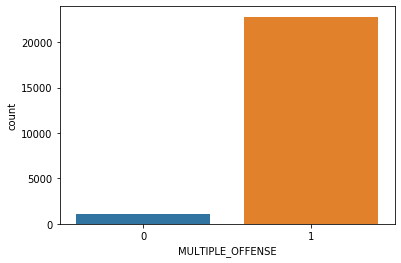

In [8]:
sns.countplot(df.MULTIPLE_OFFENSE)

In [9]:
df['MULTIPLE_OFFENSE'].value_counts()/len(df)

1    0.955231
0    0.044769
Name: MULTIPLE_OFFENSE, dtype: float64

In [10]:
# It's an imbalanced dataset

In [11]:
df['X_12'] = df['X_12'].replace(np.nan, df['X_12'].mode()[0])

In [12]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [13]:
cat_cols = df.select_dtypes(include='O')

le = LabelEncoder()

for i in cat_cols:
    df[i] = le.fit_transform(df[i])


In [14]:
X = df.drop('MULTIPLE_OFFENSE', axis=1)
y = df['MULTIPLE_OFFENSE']

In [15]:
X_valid = pd.read_csv('Test.csv')
X_valid['X_12'] = X_valid['X_12'].replace(np.nan, X_valid['X_12'].mode()[0])
X_valid['DATE'] = le.fit_transform(X_valid['DATE'])
X_valid['INCIDENT_ID'] = le.fit_transform(X_valid['INCIDENT_ID'])

idd = X_valid.copy()

In [16]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=df['MULTIPLE_OFFENSE'])

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [19]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,auc,roc_curve


algo = {'Logistic Regression':LogisticRegression(random_state=1),
        'Decision Tree':DecisionTreeClassifier(random_state=1),
        'Random Forest':RandomForestClassifier(n_estimators=100,random_state=1,n_jobs=-1),
        'Naive Bayes': GaussianNB(),
        'K Nearest Neighbors': KNeighborsClassifier(),
        'Ada Boost':AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=1,n_jobs=-1),n_estimators=100,random_state=1),
        'XG Boost':XGBClassifier(learning_rate=0.5,random_state=1,n_jobs=-1),
        'Gradient Boost': GradientBoostingClassifier(learning_rate=0.5,random_state=1),
        'Bagging':BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1,n_jobs=-1),n_estimators=50,random_state=1)
       }


for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(k,':\n')
    print("Accuracy train = " , model.score(X_train,y_train))
    print("Accuracy test = " , accuracy_score(y_test,y_pred))
    print("Precision = " ,precision_score(y_test,y_pred))
    print("Recall = " ,recall_score(y_test,y_pred))
    print('')
    print("F1 Score = " ,f1_score(y_test,y_pred))
    print('Roc-Auc score = ',roc_auc_score(y_test,y_pred))
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n',classification_report(y_test,y_pred))
    print('')
    print('________')
    print('____________________________________________________________________________________________')

Logistic Regression :

Accuracy train =  0.9567039942511527
Accuracy test =  0.9551488053653766
Precision =  0.95797019960641
Recall =  0.9967822144215299

F1 Score =  0.9769908967099132
Roc-Auc score =  0.531203607210765
Confusion matrix: 
[[  21  299]
 [  22 6815]]

               precision    recall  f1-score   support

           0       0.49      0.07      0.12       320
           1       0.96      1.00      0.98      6837

    accuracy                           0.96      7157
   macro avg       0.72      0.53      0.55      7157
weighted avg       0.94      0.96      0.94      7157


________
____________________________________________________________________________________________
Decision Tree :

Accuracy train =  1.0
Accuracy test =  0.9967863630012576
Precision =  0.9989748096074985
Recall =  0.9976597923065672

F1 Score =  0.9983168679107208
Roc-Auc score =  0.9878923961532835
Confusion matrix: 
[[ 313    7]
 [  16 6821]]

               precision    recall  f1-score   su

In [21]:
# Since our preference of valuation metric is recall score, we will consider hyperparameter tuning of those models which 
# gave the best overall recall score

# Random Forest
# KNN
# AdaBoost
# XGBoost
# Gradientboost

#### Gradient Boosting Classifier

In [22]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
from sklearn.metrics import mean_

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

params = {'learning_rate':[0.1,0.01] , 'n_estimators':[50,100,300], 'max_depth':[3,5,7]}

gcv = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = params)
gcv.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [24]:
gcv.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [25]:
gcv = gcv.best_estimator_

In [26]:
y_pred = gcv.predict(X_test)

recall_score(y_test,y_pred)

0.9998537370191605

In [27]:
roc_auc_score(y_test,y_pred)

0.9968018685095803

In [28]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):

    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

In [29]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_pred, y_test)

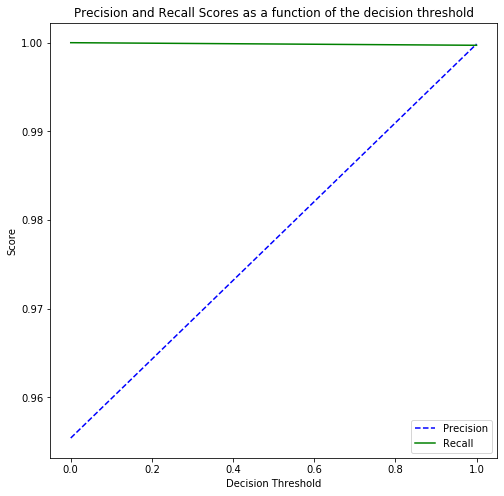

In [30]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)

In [31]:
y_valid = gcv.predict(X_valid)

##### XGBClassifier

In [32]:
from sklearn.metrics import make_scorer

In [33]:
xgb = XGBClassifier()
scorers = {'recall_score': make_scorer(recall_score), 'precision': make_scorer(precision_score)}
params = {'max_depth':[3,5,7,9],'learning_rate':[0.1,0.01,0.05,0.2],'n_estimators':[100,300,400,500]}

xgcv = GridSearchCV(estimator = XGBClassifier(), param_grid=params, n_jobs=-1,scoring=scorers)

In [34]:
# tuning gamma, min_child_weight and colsamplr_bytree is taking up too much time even for 2 values for each.

In [35]:
xgb = XGBClassifier()
scorers = {'recall_score': make_scorer(recall_score)}
params = {'max_depth':[3,7,9],'learning_rate':[0.1,0.2,0.5],'n_estimators':[100,300,500]}

xgcv = GridSearchCV(estimator = XGBClassifier(), param_grid=params, n_jobs=-1)

In [36]:
xgcv.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'max_depth': [3, 7, 9],
                         'n_estimators': [100, 300, 500]

In [37]:
xgcv = xgcv.best_estimator_

In [38]:
xgcv

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
y_pred = xgcv.predict(X_test)

recall_score(y_test,y_pred)

0.9997074740383209

In [40]:
roc_auc_score(y_test,y_pred)

0.9920412370191605

In [41]:
y_valid = model.predict(X_valid)

In [42]:
submission = pd.DataFrame({'INCIDENT_ID':idd['INCIDENT_ID'], 'MULTIPLE_OFFENSE':y_valid})

In [43]:
submission.to_csv('bestgcvpostscalling.csv', index=False)